In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("boston_house.csv")
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### splitting the data into train and test

In [3]:
X = df.iloc[: , 1: -1]
y = df.iloc[ : , -1]

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [5]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # for calculating mean_squared error
from sklearn.metrics import r2_score # for measering the goodness of best fit line
reg = LinearRegression()

## fit linear regression
reg.fit(X_train , y_train)

## predicting on test and train dataset
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

#Evaluating the model on test dataset
score=r2_score(y_test,y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

### print accuracy
print(f"value of RMSE is  {rmse_test}")
print(f"accuracy on test data : {score}")

value of RMSE is  4.568292042303152
accuracy on test data : 0.7334492147453141


In [7]:
##Evaluating on training data
score=r2_score(y_train,y_pred_train)
print(f"accuracy on train data : {score}")

accuracy on train data : 0.738339392059052


## Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

# fit the transformed features to Linear Regression
poly = LinearRegression()
poly.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly.predict(X_train_poly)

# predicting on test data-set
y_test_predict = poly.predict(X_test_poly)


# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

print(f"value of RMSE is  {rmse_test}")
print(f"accuracy on test data : {r2_test}")

value of RMSE is  3.1965276513908005
accuracy on test data : 0.8694943908738155


In [13]:
r2_test = r2_score(y_train, y_train_predicted)
print(f"accuracy on train data : {r2_test}")

accuracy on train data : 0.9315569004651907


## Learning curves of Linear regression and polynomial regression

In [14]:
def plot_learning_curves(model , X_train , X_test):
    train_errors , val_errors = [] , []
    for i in range(1 , len(X_train)):
        model.fit(X_train[:i] , y_train[:i])
        y_train_predict = model.predict(X_train[:i])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:i] ,y_train_predict))
        val_errors.append(mean_squared_error(y_test , y_val_predict))
    plt.plot(np.sqrt(train_errors) , "r-+" , linewidth = 2 , label = "train")
    plt.plot(np.sqrt(val_errors) , "b-" , linewidth = 3 , label = "val")
    plt.ylim(0, 20)
    plt.xlabel("Training set size" , fontsize = 15)
    plt.ylabel("RMSE" , fontsize = 15)
    plt.legend()

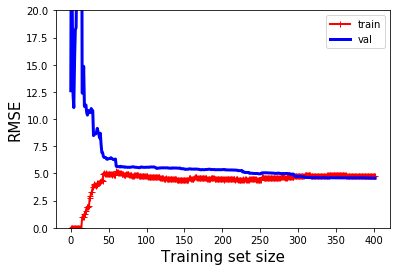

In [15]:
## Learning curve for Linear Regression
plot_learning_curves(reg , X_train , X_test)

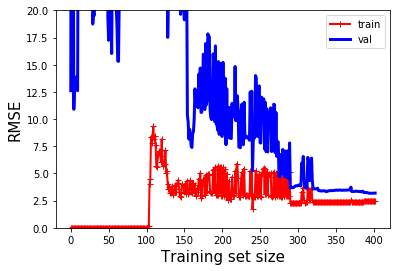

In [16]:
## Learning curve for polynomial Regression
plot_learning_curves(poly , X_train_poly , X_test_poly)